Eluvio Data Science Challenge

In [2]:
#importing data and reading files

import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
  
df = pd.read_csv('Eluvio_DS_Challenge.csv')
df['date_created'] = pd.to_datetime(df['date_created'])
df['time_created'] = pd.to_timedelta(df['time_created'], unit='s')
df['up_votes'] = pd.to_numeric(df['up_votes'])
pd.to_numeric
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,13903 days 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,13903 days 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,13903 days 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,13903 days 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,13903 days 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [3]:
#learning about the data
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])
print('Column names: ', list(df.columns))

zero_up_votes = 0
for i in df['up_votes']:
    if i == 0:
        zero_up_votes += 1

print('\nTotal Number of Up_Votes: ', df['up_votes'].sum())
print('Total Number of Down_Votes: ', df['down_votes'].sum())
print('Highest Number of Up_Votes: ', df['up_votes'].max())
print('Article Title with Highest Number of Up_Votes: ', df['title'][df['up_votes'].idxmax()])
print('Lowest Number of Up_Votes: ', df['up_votes'].min())
print('Number of Articles with 0 Up-Votes: ', zero_up_votes)

print('\nTotal Unique Authors: ', len(df['author'].unique()))

Number of rows:  509236
Number of columns:  8
Column names:  ['time_created', 'date_created', 'up_votes', 'down_votes', 'title', 'over_18', 'author', 'category']

Total Number of Up_Votes:  57154756
Total Number of Down_Votes:  0
Highest Number of Up_Votes:  21253
Article Title with Highest Number of Up_Votes:  A biotech startup has managed to 3-D print fake rhino horns that carry the same genetic fingerprint as the actual horn. The company plans to flood Chinese rhino horn market at one-eighth of the price of the original, undercutting the price poachers can get and forcing them out eventually.
Lowest Number of Up_Votes:  0
Number of Articles with 0 Up-Votes:  93555

Total Unique Authors:  85807


Which authors wrote the most articles?

Author Name, Number of Articles 

davidreiss666, 8897
anutensil, 5730
doremusjessup, 5037
maxwellhill, 4023
igeldard, 4013
trot, 3298
readerseven, 3170
twolf1, 2923
madam1, 2658
nimobo, 2564
madazzahatter, 2503
ionised, 2493
ninjadiscojesus, 2448
bridgesfreezefirst, 2405
solinvictus, 2181
libertatea, 2108
vigorous, 2077
galt1776, 1897
dougbolivar, 1770
bob21doh, 1698


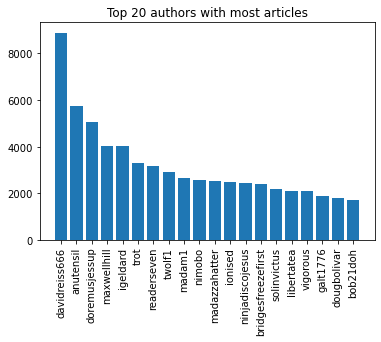

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def top_authors(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    authors = vec.transform(corpus)
    sum_authors = authors.sum(axis=0) 
    authors_freq = [(author, sum_authors[0, idx]) for author, idx in vec.vocabulary_.items()]
    authors_freq =sorted(authors_freq, key = lambda x: x[1], reverse=True)
    return authors_freq[:n]

common_authors = top_authors(df['author'], 20)

print('Author Name, Number of Articles \n')
for author, freq in common_authors:
    print(author +",", freq)

plt.bar([v[0] for v in common_authors], [v[1] for v in common_authors])
plt.title('Top 20 authors with most articles')
plt.xticks(rotation = 90)
plt.show()

Out of the top 100 articles that received the most up_votes, what were the 10 most common words in their titles (not counting stop words)?

Word, Frequency 

saudi, 11
new, 8
world, 6
just, 6
arabia, 6
company, 5
global, 5
say, 5
government, 5
china, 5


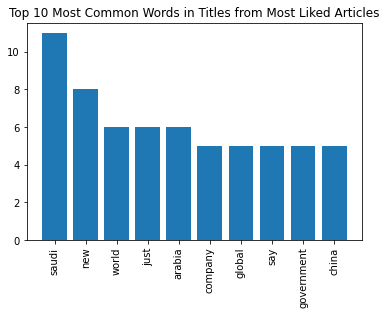

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top100articles = df.sort_values(by='up_votes', ascending=False).head(100)
common_words1 = get_top_n_words(top100articles['title'], 10)

print("Word, Frequency \n")
for word, freq in common_words1:
    print(word + ",", freq)
plt.bar([v[0] for v in common_words1], [v[1] for v in common_words1])
plt.title('Top 10 Most Common Words in Titles from Most Liked Articles')
plt.xticks(rotation = 90)
plt.show()

Out of the top 100 articles that received the least amount of  up_votes, what were the 10 most common words in their titles (not counting stop words)?

Word, Frequency 

china, 9
assange, 7
military, 6
world, 6
country, 6
wikileaks, 6
israeli, 6
says, 5
president, 5
opposition, 5


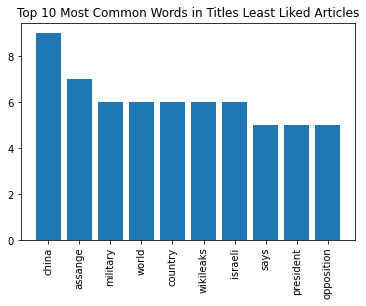

In [6]:
bottom100articles = df.sort_values(by='up_votes', ascending=True).head(100)
common_words2 = get_top_n_words(bottom100articles['title'], 10)

print("Word, Frequency \n")

for word, freq in common_words2:
    print(word + ",", freq)
plt.bar([v[0] for v in common_words2], [v[1] for v in common_words2])
plt.title('Top 10 Most Common Words in Titles Least Liked Articles')
plt.xticks(rotation = 90)
plt.show()

The two plots above have shown the most common words in titles from 

the most liked articles as: saudi, new, world, just, arabia, company, global, say, government, and china

the least liked articles as: china, assange, military, world, country, wikileaks, israeli, says, president, and opposition.

Many of the words from both lists are the same or similar, which may suggest to us that certain words in the titles do not necessarily correlate to articles that will receive more or less up_votes.

Are there certain months where articles receive more up-votes on average?

Jun 5
Aug 29
Apr 12
Mar 8
Sep 11
Oct 6
May 5
Nov 9
Feb 3
Jul 2
Dec 8
Jan 2


<BarContainer object of 12 artists>

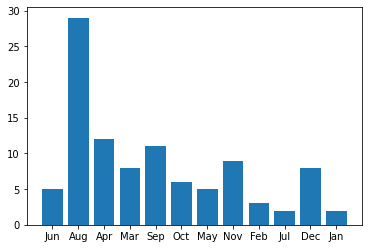

In [7]:
topMonthsList = []

for i in top100articles['date_created']:
    i = i.strftime("%b")
    topMonthsList.append(i)
freq = {}   
def CountFrequency(my_list):
    for items in my_list:
        freq[items] = my_list.count(items)   
    for key, value in freq.items():
        print(key,value)
CountFrequency(topMonthsList)
plt.bar(freq.keys(),freq.values())


As can be seen by the plot above, the articles created in the month of August have significantly higher number of up_votes than those in the rest of the months. This shows that there may be a strong correlation between articles created in August and a higher overall number of up_votes per article.

Are there certain months where articles receive less up-votes on average?

Jun 5
Aug 16
Apr 1
Mar 8
Sep 32
Oct 6
May 5
Nov 9
Feb 3
Jul 2
Dec 28
Jan 23


<BarContainer object of 12 artists>

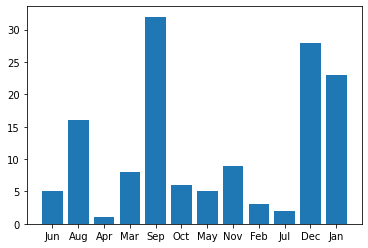

In [8]:
bottomMonthsList = []

for i in bottom100articles['date_created']:
    i = i.strftime("%b")
    bottomMonthsList.append(i)
    
CountFrequency(bottomMonthsList)
plt.bar(freq.keys(),freq.values())

The plot above shows the articled created in the months of September, December, and January to have lower up_votes than articles created in other months. This may suggest that people are less likely to up_vote an article if it is creted toward the winter time.

Is there a correlation between the length of the article title and the number of up_votes it receives?

1. Linear Regression

In [46]:
top100articles['title_length'] = top100articles['title'].str.len()

#splitting dataset into testing and training datasets

from sklearn.model_selection import train_test_split

x = top100articles['title_length'].values.reshape(-1, 1)
y = top100articles['up_votes'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

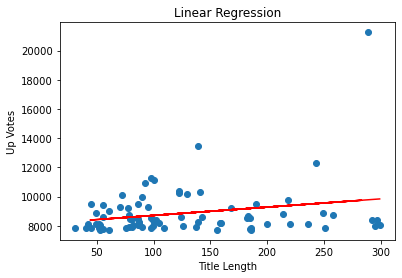

In [67]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  # create object for the class
LinMod = regressor.fit(x_train, y_train)  # perform linear regression
y_pred = regressor.predict(x_test) #make predictions

plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Title Length')
plt.ylabel('Up Votes')
plt.show()

In [57]:
from sklearn import metrics
#results of the Linear Regression Model

r_sq = LinMod.score(x, y)
print('Coefficient of Determination:', r_sq)
print('Intercept:', LinMod.intercept_)
print('Slope:', LinMod.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.06774925458301695
Intercept: [8148.14565525]
Slope: [[5.6675831]]
Mean Absolute Error: 932.1652908361905
Mean Squared Error: 1493543.0480107623
Root Mean Squared Error: 1222.1059888613436


The Coefficient of Determination is extremely low and the Mean Squared Error is extremely high, which shows that this model is not a good fit for the data. Let's try a polynomial regression model to see if that is a better fit.

Text(0, 0.5, 'Up Votes')

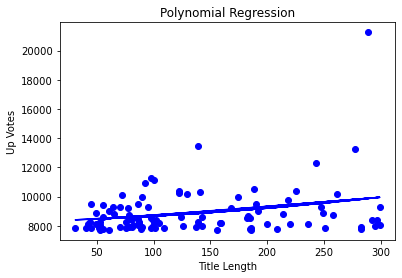

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
  
poly.fit(x_poly, y)
regressor2 = LinearRegression()
PolyMod = regressor2.fit(x_poly, y)

plt.scatter(x, y, color = 'blue')
plt.plot(x, regressor2.predict(x_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Title Length')
plt.ylabel('Up Votes')


This model also does not seem to be much of a better fit for the data. Thereofore, there does not seem to be any linear or polynomial(degree = 2) correlations between the length of the title and the number of up-votes received.

SUMMARY OF FINDINGS:

In this report we have discovered who the authors who wrote the most articles were as well as the number of articles they wrote. 

Then we identified the top 100 articles that received the most and least up-votes in order to determine the 10 most common words in their titles to see if certain words in titles led to more or less people giving the articles up-votes. From this we discovered that many of the title words from both the most up-voted articles and the least up-voted articles were the same or similar, which suggested that there most likely is no correlation between the article titles and the amount of up-votes received.

We then investigated which months articles were created in to determine if creation during certain months would lead to more or less up-votes. From this we determined that articles created in August had a significantly higher amount of up-votes overall when compared to other months and articles created in September, December, and January have lower up-votes overall. This suggests that there may be a correlation between when the article is created and how many up-votes it receives.

We then conducted a linear regression as well as a polynomial regression of degree = 2 in order to determine if there is a linear or polynomial trend among the data of the length of the article titles and the amount of up-votes received. Both of these models did not fit the data well and indicated that there most likely is no correlation between the length of the article titles and the amount of up-votes received.

Overall, if I were to make any suggestions to future authors that are writing articles of a similar nature, it would be to not worry about article titles as much and to focus on writing more articles around August rather than the winter time. However, the higher or lower amount of overall up-votes in certain months may also have been caused by important global events occuring in those months. Therefore, more data needs to be collected, and more analysis needs to be done in order to be confident that the article creation date has an effect on the number of up-votes it will receive.